# Metrics and Plots for the trained models

In [317]:
seed=0

In [318]:
MAIN_DUMP=f'../../dump_seeds/dump_{seed}'
import os,sys
from joblib import Parallel, delayed,dump,load

sys.path.append(os.path.abspath('../../src/ml'))
from load_matrix import load_df
from model_trainer import MLModel
from utils import load_models

import pandas as pd

from evaluator import Evaluator
from collector import ResultsCollector
from visualizer import DashboardVisualizer


## v2.10

In [319]:
current_version='v2.10'
standard_models=load_models(MAIN_DUMP,version=current_version,normalization='standard')
robust_models=load_models(MAIN_DUMP,version=current_version,normalization='robust')
none_models =load_models(MAIN_DUMP,version=current_version,normalization='none')
log1p_models=load_models(MAIN_DUMP,version=current_version,normalization='log1p')
minmax_models=load_models(MAIN_DUMP,version=current_version,normalization='minmax')

In [320]:
collector = ResultsCollector()
metrics_list = []
metrics_list=[]
for norm in ['none','robust','standard','log1p','minmax']:
        current_dict=eval(f"{norm}_models")
        for model_name, ml_model in current_dict.items():
                print(f'-- Evaluating model: {model_name} {current_version} {norm} --')
                y_test, y_pred, y_proba = ml_model.y_test, ml_model.y_pred, ml_model.y_proba
                metrics = Evaluator(y_test, y_pred, y_proba).compute_metrics()
                metrics_list.append({
                        "model": ml_model.model_type,
                        "input": ml_model.dataset_name,
                        "normalization": norm,  
                        "version": current_version,
                        **metrics
                })

                collector.add(ml_model.model_type, ml_model.dataset_name, y_test, y_pred, y_proba)
results=pd.DataFrame(metrics_list)

# -- gex not related to version
results.loc[results['input']=='gene_expression', 'version'] = ''

-- Evaluating model: pytorch_mlp_Complex_protein_embeddings_gridsearch_model.joblib v2.10 none --
-- Evaluating model: pytorch_mlp_Complex_sample_embeddings_gridsearch_model.joblib v2.10 none --
-- Evaluating model: pytorch_mlp_concatenated_protein_embeddings_gridsearch_model.joblib v2.10 none --
-- Evaluating model: pytorch_mlp_concatenated_sample_embeddings_gridsearch_model.joblib v2.10 none --
-- Evaluating model: pytorch_mlp_gene_expression_gridsearch_model.joblib v2.10 none --
-- Evaluating model: pytorch_mlp_RGCN_protein_embeddings_gridsearch_model.joblib v2.10 none --
-- Evaluating model: pytorch_mlp_RGCN_sample_embeddings_gridsearch_model.joblib v2.10 none --
-- Evaluating model: random_forest_Complex_protein_embeddings_gridsearch_model.joblib v2.10 none --
-- Evaluating model: random_forest_Complex_sample_embeddings_gridsearch_model.joblib v2.10 none --
-- Evaluating model: random_forest_concatenated_protein_embeddings_gridsearch_model.joblib v2.10 none --
-- Evaluating model:

In [321]:
results[results['input']=='gene_expression'] # -- checking version

,model,input,normalization,version,balanced_accuracy,precision,recall,f1,mcc,auroc,auprc,brier
4,pytorch_mlp,gene_expression,none,,0.500000,0.775510,1.000000,0.873563,0.000000,0.906699,0.975409,0.179481
11,random_forest,gene_expression,none,,0.714115,0.860465,0.973684,0.913580,0.545073,0.921053,0.976706,0.105057
18,sklearn_mlp,gene_expression,none,,0.500000,0.775510,1.000000,0.873563,0.000000,0.500000,0.775510,0.244545
25,svm,gene_expression,none,,0.928230,0.972973,0.947368,0.960000,0.831005,0.983254,0.995719,0.044694
32,xgboost,gene_expression,none,,0.869617,0.945946,0.921053,0.933333,0.717264,0.913876,0.971725,0.087671


In [322]:
results_10=results

In [323]:
results.loc[results['model']=='svm']

,model,input,normalization,version,balanced_accuracy,precision,recall,f1,mcc,auroc,auprc,brier
21,svm,Complex_protein_embeddings,none,v2.10,0.500000,0.775510,1.000000,0.873563,0.000000,0.930622,0.980857,0.095701
22,svm,Complex_sample_embeddings,none,v2.10,0.500000,0.775510,1.000000,0.873563,0.000000,0.622010,0.863608,0.167282
23,svm,concatenated_protein_embeddings,none,v2.10,0.500000,0.775510,1.000000,0.873563,0.000000,0.509569,0.807459,0.174280
24,svm,concatenated_sample_embeddings,none,v2.10,0.500000,0.775510,1.000000,0.873563,0.000000,0.538278,0.777521,0.173975
25,svm,gene_expression,none,,0.928230,0.972973,0.947368,0.960000,0.831005,0.983254,0.995719,0.044694
26,svm,RGCN_protein_embeddings,none,v2.10,0.500000,0.775510,1.000000,0.873563,0.000000,0.509569,0.807459,0.174571
27,svm,RGCN_sample_embeddings,none,v2.10,0.500000,0.775510,1.000000,0.873563,0.000000,0.538278,0.777521,0.173974
44,svm,Complex_protein_embeddings,robust,v2.10,0.655502,0.837209,0.947368,0.888889,0.395863,0.714115,0.825616,0.152093
45,svm,concatenated_protein_embeddings,robust,v2.10,0.500000,0.775510,1.000000,0.873563,0.000000,0.423445,0.779231,0.173914
46,svm,RGCN_protein_embeddings,robust,v2.10,0.500000,0.775510,1.000000,0.873563,0.000000,0.423445,0.779231,0.173915


## v2.11

In [324]:
current_version='v2.11'
standard_models=load_models(MAIN_DUMP,version=current_version,normalization='standard')
robust_models=load_models(MAIN_DUMP,version=current_version,normalization='robust')
none_models =load_models(MAIN_DUMP,version=current_version,normalization='none')
log1p_models=load_models(MAIN_DUMP,version=current_version,normalization='log1p')
minmax_models=load_models(MAIN_DUMP,version=current_version,normalization='minmax')

collector = ResultsCollector()
metrics_list = []
metrics_list=[]
for norm in ['none','robust','standard','log1p','minmax']:
        current_dict=eval(f"{norm}_models")
        for model_name, ml_model in current_dict.items():
                print(f'-- Evaluating model: {model_name} {current_version} {norm} --')
                y_test, y_pred, y_proba = ml_model.y_test, ml_model.y_pred, ml_model.y_proba
                metrics = Evaluator(y_test, y_pred, y_proba).compute_metrics()
                metrics_list.append({
                        "model": ml_model.model_type,
                        "input": ml_model.dataset_name,
                        "normalization": norm,  
                        "version": current_version,
                        **metrics
                })

                collector.add(ml_model.model_type, ml_model.dataset_name, y_test, y_pred, y_proba)
results=pd.DataFrame(metrics_list)
results.loc[results['input']=='gene_expression', 'version'] = ''

-- Evaluating model: pytorch_mlp_Complex_protein_embeddings_gridsearch_model.joblib v2.11 none --
-- Evaluating model: pytorch_mlp_Complex_sample_embeddings_gridsearch_model.joblib v2.11 none --
-- Evaluating model: pytorch_mlp_concatenated_protein_embeddings_gridsearch_model.joblib v2.11 none --
-- Evaluating model: pytorch_mlp_concatenated_sample_embeddings_gridsearch_model.joblib v2.11 none --
-- Evaluating model: pytorch_mlp_RGCN_protein_embeddings_gridsearch_model.joblib v2.11 none --
-- Evaluating model: pytorch_mlp_RGCN_sample_embeddings_gridsearch_model.joblib v2.11 none --
-- Evaluating model: random_forest_Complex_protein_embeddings_gridsearch_model.joblib v2.11 none --
-- Evaluating model: random_forest_Complex_sample_embeddings_gridsearch_model.joblib v2.11 none --
-- Evaluating model: random_forest_concatenated_protein_embeddings_gridsearch_model.joblib v2.11 none --
-- Evaluating model: random_forest_concatenated_sample_embeddings_gridsearch_model.joblib v2.11 none --
-- 

In [325]:
results_11=results

### saving csv

In [326]:
results_10.to_csv(f'../../results/score_tables/scores_v2.10_seed{seed}.csv',index=False)
results_11.to_csv(f'../../results/score_tables/scores_v2.11_seed{seed}.csv',index=False)

all_results=pd.concat([results_10,results_11],axis=0)
all_results.to_csv(f'../../results/score_tables/scores_all_seed{seed}.csv',index=False)

### analysis

In [327]:
from IPython.display import display
display(all_results)

,model,input,normalization,version,balanced_accuracy,precision,recall,f1,mcc,auroc,auprc,brier
0,pytorch_mlp,Complex_protein_embeddings,none,v2.10,0.500000,0.775510,1.000000,0.873563,0.000000,0.846890,0.960741,0.196809
1,pytorch_mlp,Complex_sample_embeddings,none,v2.10,0.500000,0.775510,1.000000,0.873563,0.000000,0.342105,0.730382,0.202039
2,pytorch_mlp,concatenated_protein_embeddings,none,v2.10,0.500000,0.000000,0.000000,0.000000,0.000000,0.500000,0.775510,0.775510
3,pytorch_mlp,concatenated_sample_embeddings,none,v2.10,0.507177,0.800000,0.105263,0.186047,0.019786,0.507177,0.778088,0.714286
4,pytorch_mlp,gene_expression,none,,0.500000,0.775510,1.000000,0.873563,0.000000,0.906699,0.975409,0.179481
...,...,...,...,...,...,...,...,...,...,...,...,...
85,svm,concatenated_protein_embeddings,minmax,v2.11,0.824163,0.921053,0.921053,0.921053,0.648325,0.918660,0.976031,0.096490
86,svm,RGCN_protein_embeddings,minmax,v2.11,0.824163,0.921053,0.921053,0.921053,0.648325,0.918660,0.976031,0.096490
87,xgboost,Complex_protein_embeddings,minmax,v2.11,0.901914,0.971429,0.894737,0.931507,0.742426,0.942584,0.984163,0.084543
88,xgboost,concatenated_protein_embeddings,minmax,v2.11,0.915072,0.972222,0.921053,0.945946,0.784546,0.954545,0.986396,0.075406


### averaging

In [328]:
# -- take all seed files and make an average dataframe of all seeds
df0 = pd.read_csv('../../results/score_tables/scores_all_seed0.csv'); df0['seed'] = 0
df1 = pd.read_csv('../../results/score_tables/scores_all_seed1.csv'); df1['seed'] = 1
df2 = pd.read_csv('../../results/score_tables/scores_all_seed2.csv'); df2['seed'] = 2
df3 = pd.read_csv('../../results/score_tables/scores_all_seed3.csv'); df3['seed'] = 3
df4 = pd.read_csv('../../results/score_tables/scores_all_seed4.csv'); df4['seed'] = 4
df5 = pd.read_csv('../../results/score_tables/scores_all_seed5.csv'); df5['seed'] = 5
df6 = pd.read_csv('../../results/score_tables/scores_all_seed6.csv'); df6['seed'] = 6
df7 = pd.read_csv('../../results/score_tables/scores_all_seed7.csv'); df7['seed'] = 7
df8 = pd.read_csv('../../results/score_tables/scores_all_seed8.csv'); df8['seed'] = 8
df9 = pd.read_csv('../../results/score_tables/scores_all_seed9.csv'); df9['seed'] = 9


dfs = [df0, df1, df2, df3, df4, df5, df6, df7, df8, df9]


# concatenate all seeds
all_df = pd.concat(dfs)

# -- those who have null version => "no version"
all_df['version'] = all_df['version'].fillna('no version').replace('', 'no version')
all_df

avg_df = all_df.groupby(['model','input','normalization','version']).mean().reset_index().drop(columns=['seed'], errors='ignore')
std_df = all_df.groupby(['model','input','normalization','version']).std().reset_index().drop(columns=['seed'], errors='ignore')

In [329]:
# -- remove the seed col
all_df['input']=='gene_expression'

0      False
1      False
2      False
3      False
4       True
       ...  
180    False
181    False
182    False
183    False
184    False
Name: input, Length: 1850, dtype: bool

In [330]:
# -- save all_df
all_df.to_csv('../../results/score_tables/scores_all_seeds.csv',index=False)
avg_df.to_csv('../../results/score_tables/scores_avg_seeds.csv',index=False)
std_df.to_csv('../../results/score_tables/scores_std_seeds.csv',index=False)

In [331]:
avg_df['input'].unique()

array(['Complex_protein_embeddings', 'Complex_sample_embeddings',
       'RGCN_protein_embeddings', 'RGCN_sample_embeddings',
       'concatenated_protein_embeddings',
       'concatenated_sample_embeddings', 'gene_expression'], dtype=object)

## Viz

In [332]:
version='v2.10'
norm='minmax'
df=avg_df
filtered_results=df[((df['version']==version) | (df['input']=='gene_expression')) & (df['normalization']==norm)]
# --remove last 4 rows which are duplicates of gene_expression with different version (ne seed version with 2 gex for 2 versions)
# filtered_results=filtered_results[:-5]
# -- add those with gene_expression input if not there (v2.11)



In [333]:
filtered_results

,model,input,normalization,version,balanced_accuracy,precision,recall,f1,mcc,auroc,auprc,brier
2,pytorch_mlp,Complex_protein_embeddings,minmax,v2.10,0.500000,0.620408,0.800000,0.698851,0.000000,0.678708,0.877657,0.216016
14,pytorch_mlp,RGCN_protein_embeddings,minmax,v2.10,0.500000,0.232653,0.300000,0.262069,0.000000,0.500000,0.775510,0.610204
26,pytorch_mlp,concatenated_protein_embeddings,minmax,v2.10,0.500000,0.155102,0.200000,0.174713,0.000000,0.500000,0.775510,0.665306
39,random_forest,Complex_protein_embeddings,minmax,v2.10,0.875837,0.938053,0.978947,0.957585,0.802802,0.978589,0.993864,0.064308
51,random_forest,RGCN_protein_embeddings,minmax,v2.10,0.620455,0.823355,0.950000,0.881402,0.335878,0.758014,0.902494,0.146610
63,random_forest,concatenated_protein_embeddings,minmax,v2.10,0.877153,0.937938,0.981579,0.958884,0.809263,0.973206,0.992086,0.065920
76,sklearn_mlp,Complex_protein_embeddings,minmax,v2.10,0.930383,0.967156,0.978947,0.972577,0.878588,0.983254,0.994725,0.038868
88,sklearn_mlp,RGCN_protein_embeddings,minmax,v2.10,0.497368,0.774555,0.994737,0.870913,-0.011099,0.497368,0.774605,0.228282
100,sklearn_mlp,concatenated_protein_embeddings,minmax,v2.10,0.499761,0.775792,0.963158,0.856796,-0.006841,0.499761,0.775451,0.240924
113,svm,Complex_protein_embeddings,minmax,v2.10,0.946531,0.979658,0.965789,0.972191,0.882244,0.988278,0.996865,0.035101


### 1. grouped bar plots

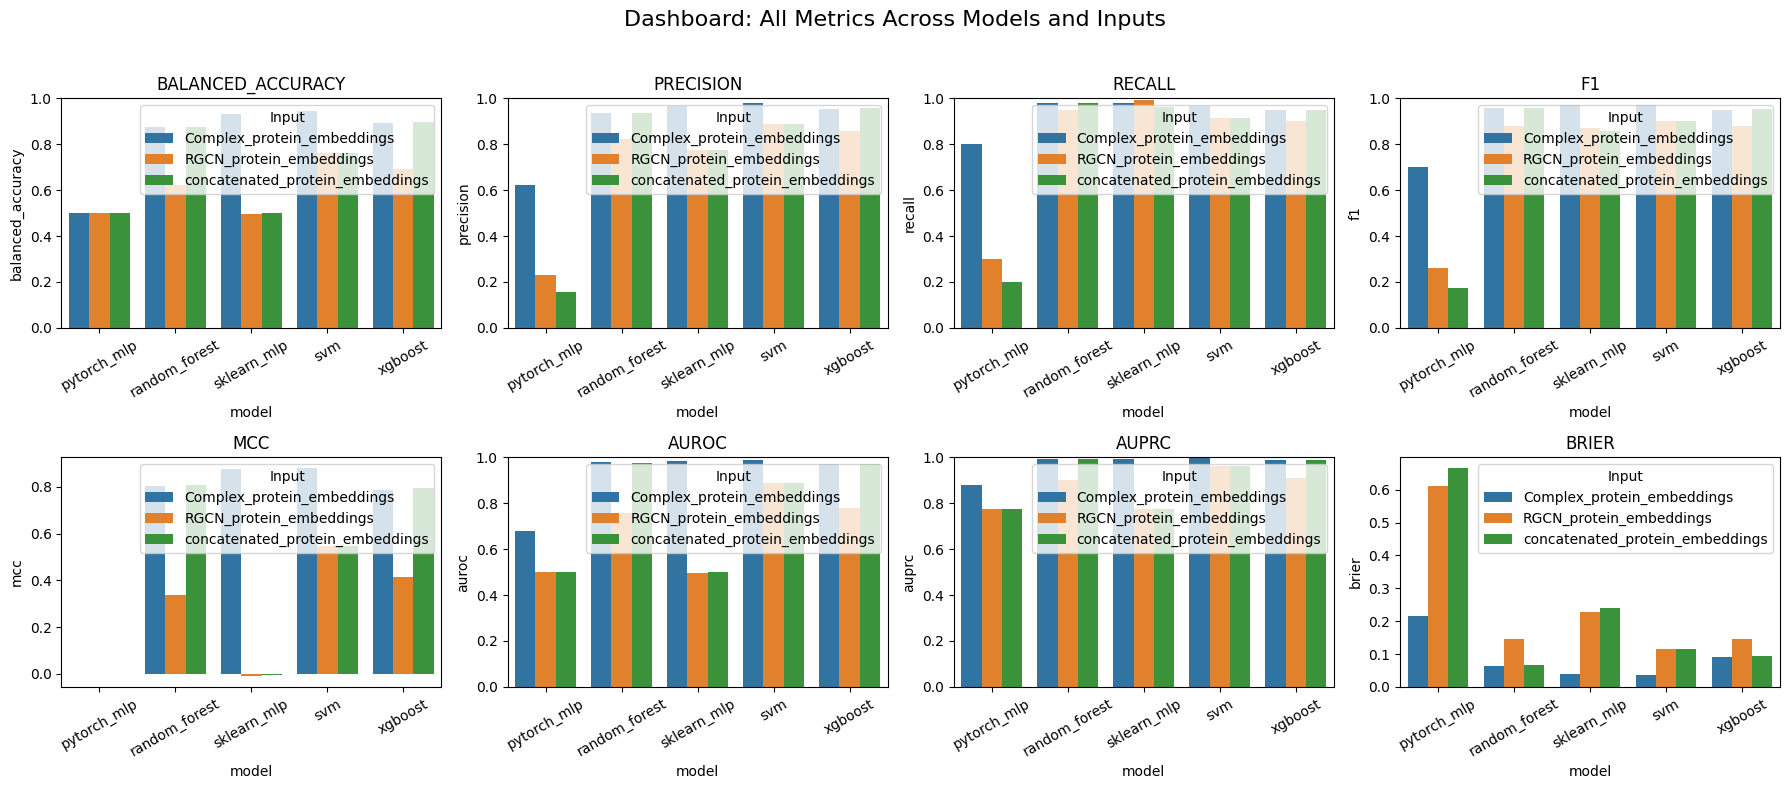

In [334]:
collector = ResultsCollector()
dashboard = DashboardVisualizer(filtered_results, collector)
dashboard.plot_metric_grid()

### 2. heatmap

model_dataset x score matrix 

In [335]:
# metric='balanced_accuracy'

In [336]:
filtered_results

,model,input,normalization,version,balanced_accuracy,precision,recall,f1,mcc,auroc,auprc,brier
2,pytorch_mlp,Complex_protein_embeddings,minmax,v2.10,0.500000,0.620408,0.800000,0.698851,0.000000,0.678708,0.877657,0.216016
14,pytorch_mlp,RGCN_protein_embeddings,minmax,v2.10,0.500000,0.232653,0.300000,0.262069,0.000000,0.500000,0.775510,0.610204
26,pytorch_mlp,concatenated_protein_embeddings,minmax,v2.10,0.500000,0.155102,0.200000,0.174713,0.000000,0.500000,0.775510,0.665306
39,random_forest,Complex_protein_embeddings,minmax,v2.10,0.875837,0.938053,0.978947,0.957585,0.802802,0.978589,0.993864,0.064308
51,random_forest,RGCN_protein_embeddings,minmax,v2.10,0.620455,0.823355,0.950000,0.881402,0.335878,0.758014,0.902494,0.146610
63,random_forest,concatenated_protein_embeddings,minmax,v2.10,0.877153,0.937938,0.981579,0.958884,0.809263,0.973206,0.992086,0.065920
76,sklearn_mlp,Complex_protein_embeddings,minmax,v2.10,0.930383,0.967156,0.978947,0.972577,0.878588,0.983254,0.994725,0.038868
88,sklearn_mlp,RGCN_protein_embeddings,minmax,v2.10,0.497368,0.774555,0.994737,0.870913,-0.011099,0.497368,0.774605,0.228282
100,sklearn_mlp,concatenated_protein_embeddings,minmax,v2.10,0.499761,0.775792,0.963158,0.856796,-0.006841,0.499761,0.775451,0.240924
113,svm,Complex_protein_embeddings,minmax,v2.10,0.946531,0.979658,0.965789,0.972191,0.882244,0.988278,0.996865,0.035101


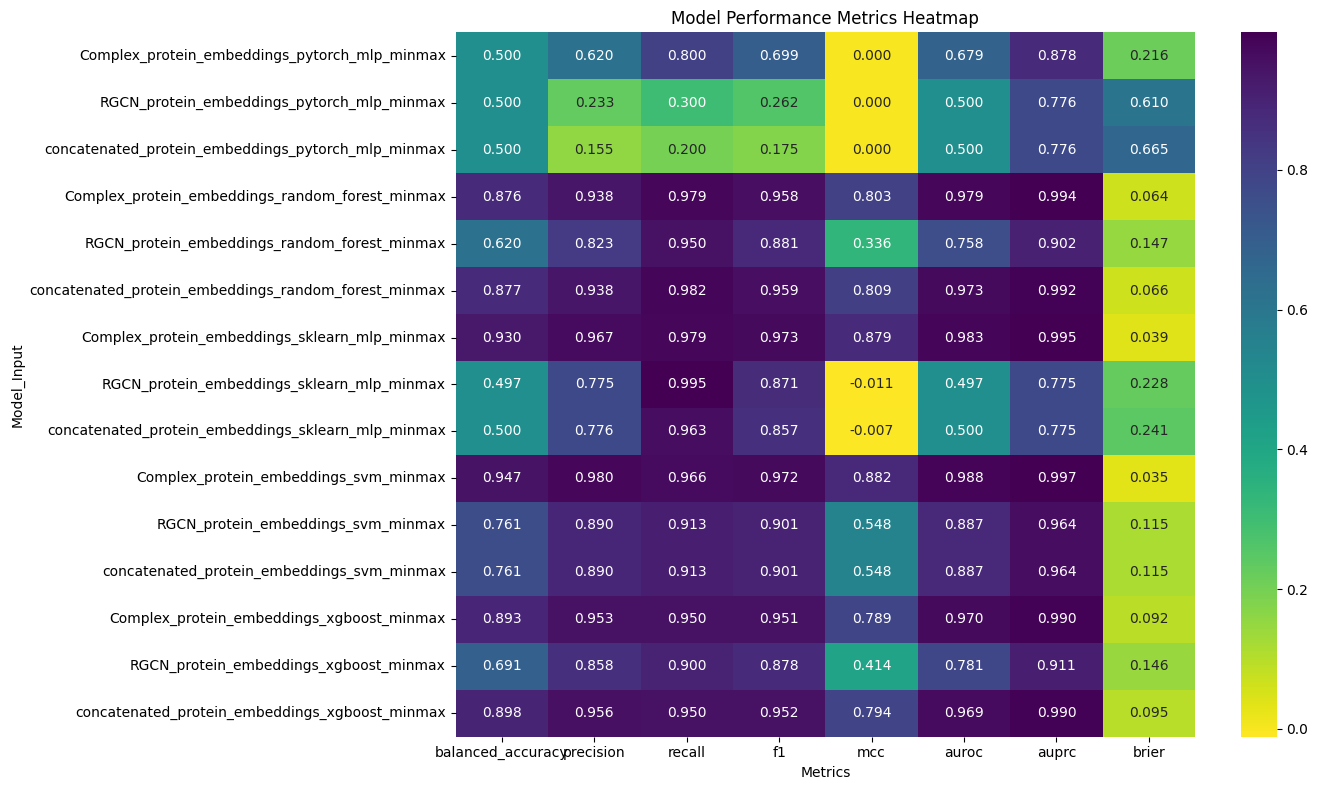

In [337]:
import seaborn as sns
import matplotlib.pyplot as plt

metrics = ['balanced_accuracy', 'precision', 'recall', 'f1', 'mcc', 'auroc','auprc','brier']
filtered_results['model_input'] = filtered_results['input'] + '_' + filtered_results['model'] + '_' + filtered_results['normalization']
heatmap_data = filtered_results.set_index('model_input')[metrics]

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, cmap="viridis_r", fmt=".3f")
plt.title("Model Performance Metrics Heatmap")
plt.ylabel("Model_Input")
plt.xlabel("Metrics")

plt.yticks(rotation=0) 
plt.tight_layout()
plt.show()


### 3. radar plot

To be more readbale better make a radar plot per model (one for svm, one for xgboost...)

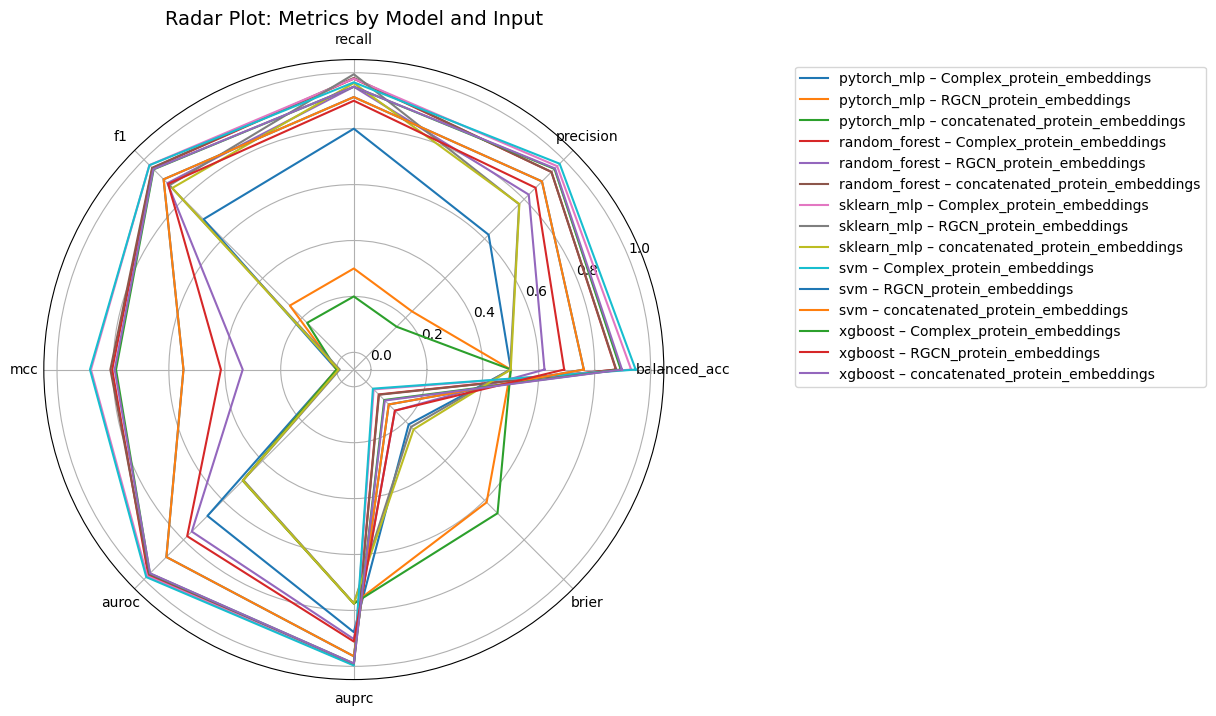

In [338]:
dashboard.plot_radar()

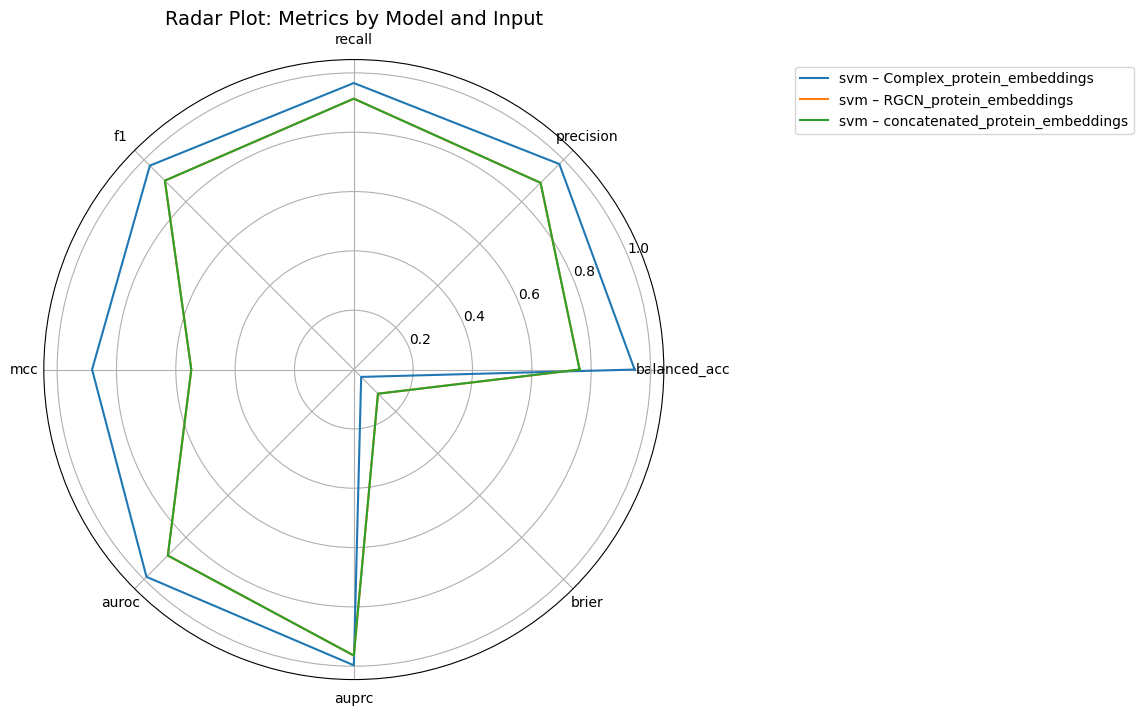

In [339]:
collector = ResultsCollector()
svm_filtered_results=filtered_results[filtered_results['model']=='svm']
dashboard = DashboardVisualizer(svm_filtered_results, collector)
dashboard.plot_radar()

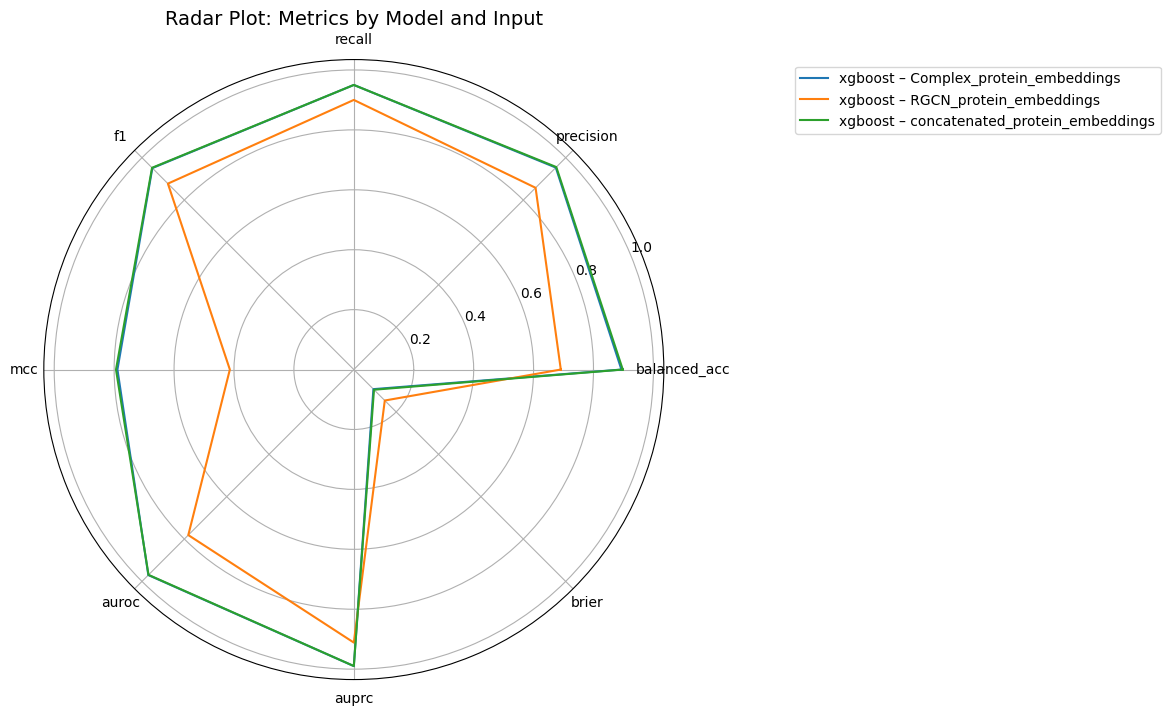

In [340]:
collector = ResultsCollector()
xgboost_filtered_results=filtered_results[filtered_results['model']=='xgboost']
dashboard = DashboardVisualizer(xgboost_filtered_results, collector)
dashboard.plot_radar()


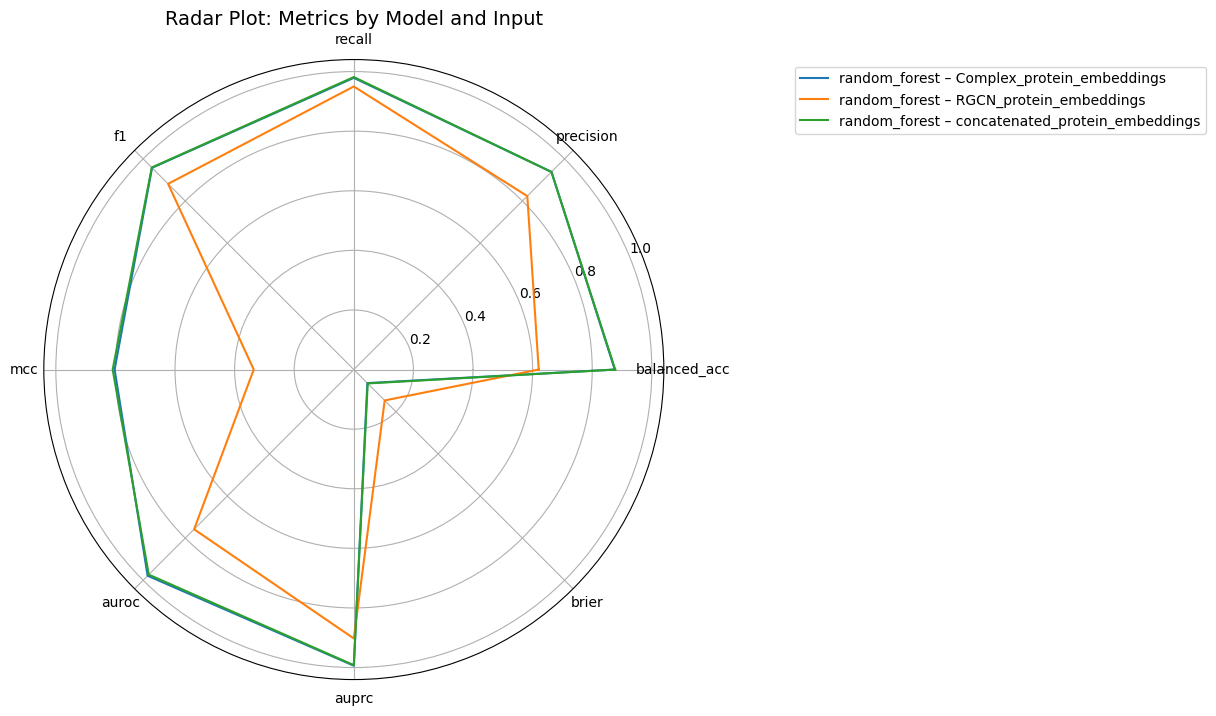

In [341]:
collector = ResultsCollector()
random_forest_filtered_results=filtered_results[filtered_results['model']=='random_forest']
dashboard = DashboardVisualizer(random_forest_filtered_results, collector)
dashboard.plot_radar()

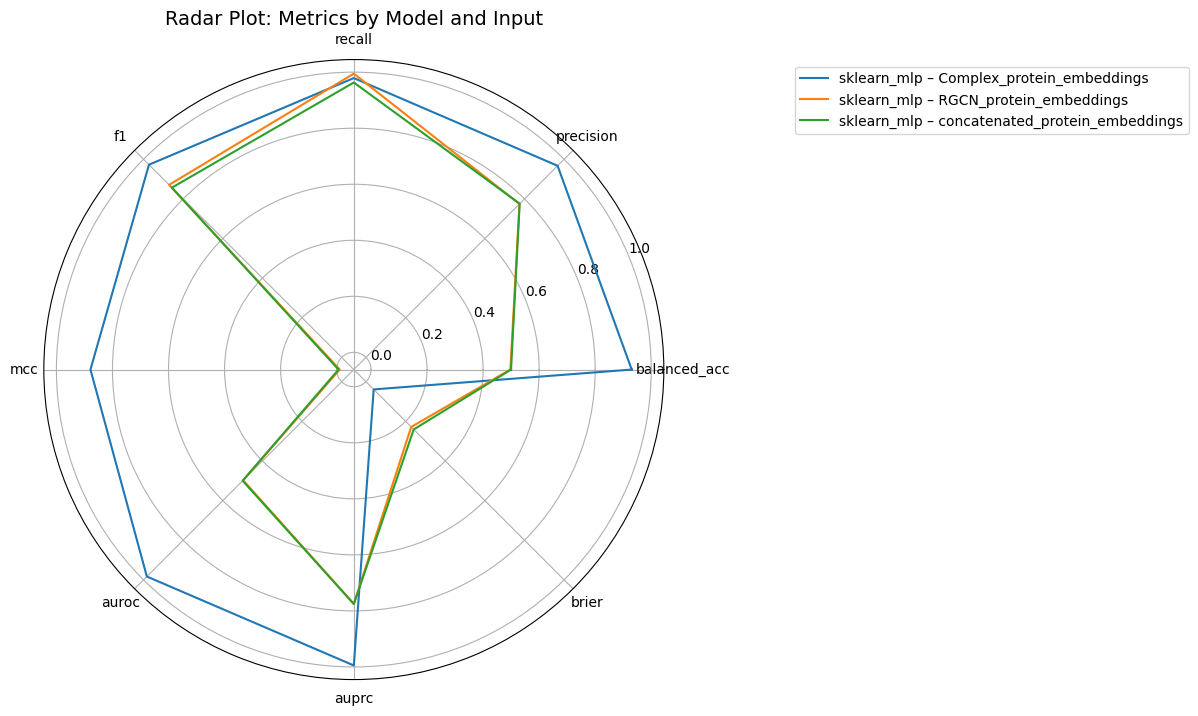

In [342]:
collector = ResultsCollector()
sklearn_mlp_filtered_results=filtered_results[filtered_results['model']=='sklearn_mlp']
dashboard = DashboardVisualizer(sklearn_mlp_filtered_results, collector)
dashboard.plot_radar()

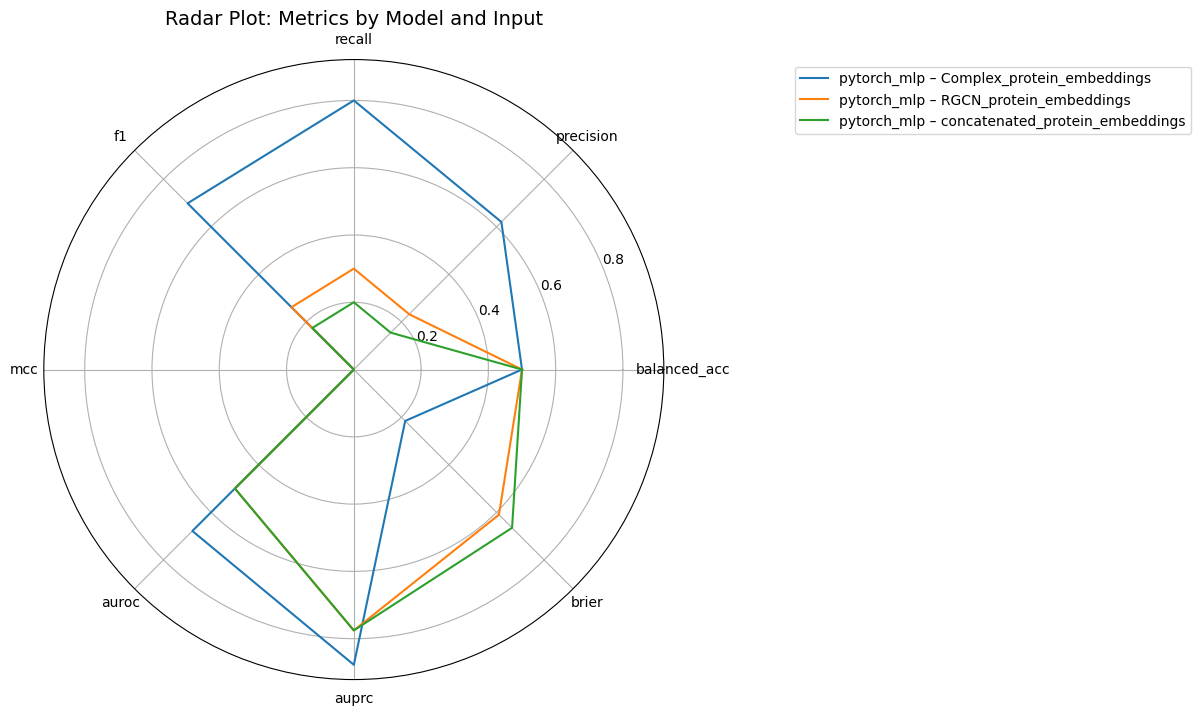

In [343]:
collector = ResultsCollector()
pytorch_mlp_filtered_results=filtered_results[filtered_results['model']=='pytorch_mlp']
dashboard = DashboardVisualizer(pytorch_mlp_filtered_results, collector)
dashboard.plot_radar()

### 5. scatter plot

somparing 2 strong(?) models, each point is a dataset+metrix, can have shape of point by metric and color by dataset (or just for one metric for now)

In [344]:
metric='precision'

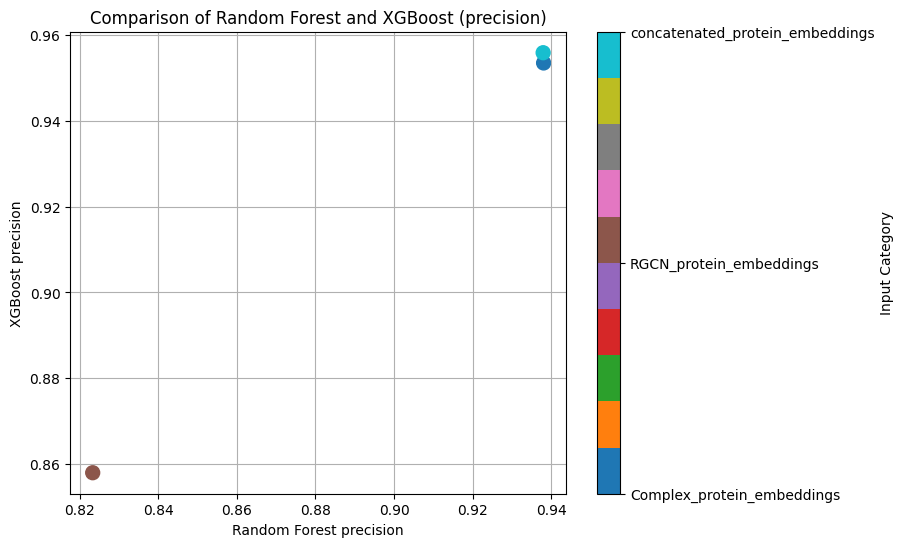

In [345]:
import matplotlib.pyplot as plt

rf = filtered_results[filtered_results['model'] == 'random_forest'][['input', metric]]
xgb = filtered_results[filtered_results['model'] == 'xgboost'][['input', metric]]

merged = rf.merge(xgb, on='input', suffixes=('_rf', '_xgb'))

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    merged[metric + '_rf'],
    merged[metric + '_xgb'],
    s=100,
    c=merged['input'].astype('category').cat.codes,
    cmap='tab10'
)

plt.xlabel('Random Forest ' + metric)
plt.ylabel('XGBoost ' + metric)
plt.title('Comparison of Random Forest and XGBoost (' + metric + ')')
plt.grid()

cbar = plt.colorbar(scatter)
cbar.set_label('Input Category')
cbar.set_ticks(range(len(merged['input'].astype('category').cat.categories)))
cbar.set_ticklabels(merged['input'].astype('category').cat.categories)

plt.show()


### 6. rank dist plot
showing the rank distribution of models over datasets for a given metric

In [346]:
metric='balanced_accuracy'

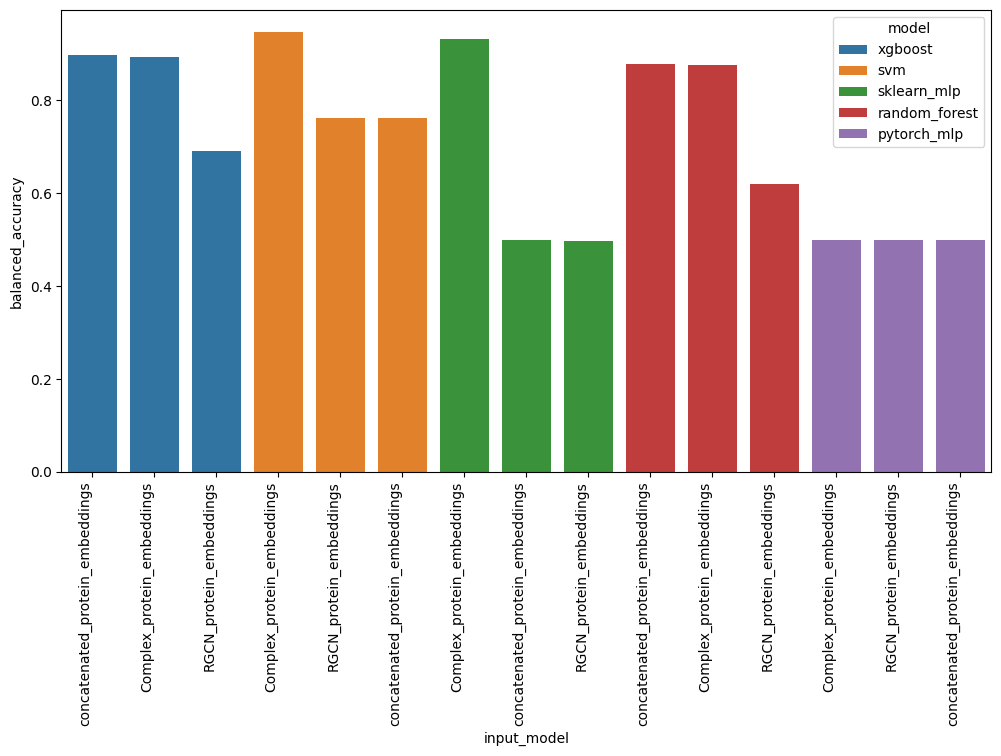

In [347]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# -- df sorted by model then by metric
sorted_df=filtered_results.sort_values(by=['model', metric],ascending=False)
sorted_df['input_model']=sorted_df['input']+'_'+sorted_df['model']

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=sorted_df, x='input_model', y=metric, hue='model', dodge=False, palette='tab10')

ax.set_xticks(range(len(sorted_df)))
ax.set_xticklabels(sorted_df['input'], rotation=90, ha='right', fontsize=10)

# # bar plot and color by model
# plt.figure(figsize=(12, 6))
# sns.barplot(data=sorted_df, x='input_model', y=metric,hue='model')
# plt.title(f'Model Performance by {metric.capitalize()}')
# plt.xlabel('trained model')
# plt.ylabel(metric.capitalize())
# plt.xticks(rotation=45, ha='right', fontsize=10)
# plt.legend(title='Model')
# plt.tight_layout()
plt.show()